In [2]:
import pandas as pd

df_WorldCupMatches=pd.read_csv(r'C:\Users\91735\OneDrive\Desktop\analyst content\data\unified mentor\Fifa_World_Cup_Prediction\FIFA WC data\WorldCupMatches.csv')
df_WorldCupPlayers=pd.read_csv(r'C:\Users\91735\OneDrive\Desktop\analyst content\data\unified mentor\Fifa_World_Cup_Prediction\FIFA WC data\WorldCupPlayers.csv')
df_WorldCups=pd.read_csv(r'C:\Users\91735\OneDrive\Desktop\analyst content\data\unified mentor\Fifa_World_Cup_Prediction\FIFA WC data\WorldCups.csv')

In [9]:

# Check for missing values in each dataset
missing_values_world_cups = df_WorldCups.isnull().sum()
missing_values_world_cup_matches = df_WorldCupMatches.isnull().sum()
missing_values_world_cup_players = df_WorldCupPlayers.isnull().sum()

missing_values_world_cup_players

RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64

In [13]:
df_WorldCups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


In [18]:
# Data Cleaning

# Dropping rows with missing values in critical columns of the WorldCupMatches dataset
world_cup_matches_cleaned = df_WorldCupMatches.dropna(subset=['Year', 'Home Team Name', 'Away Team Name', 'Home Team Goals', 'Away Team Goals'])

# Dropping rows with missing values in critical columns of the WorldCupPlayers dataset
world_cup_players_cleaned = df_WorldCupPlayers.dropna(subset=['Player Name', 'Team Initials', 'Coach Name'])

# Summary statistics for the WorldCups dataset
summary_stats_world_cups = df_WorldCups.describe(include='all')
df_WorldCups_cleaned=df_WorldCups.copy()
df_WorldCups_cleaned['Attendance']=df_WorldCups['Attendance'].str.replace('.', '', regex=False)
df_WorldCups_cleaned['Attendance'] = df_WorldCups_cleaned['Attendance'].astype(int)
# Visualizing trends in the WorldCups dataset
goals_trend = df_WorldCups_cleaned[['Year', 'GoalsScored']].set_index('Year')
attendance_trend = df_WorldCups_cleaned[['Year', 'Attendance']].set_index('Year')
matches_trend = df_WorldCups_cleaned[['Year', 'MatchesPlayed']].set_index('Year')




In [20]:
attendance_trend

,Attendance
Year,
1930,590549
1934,363000
1938,375700
1950,1045246
1954,768607
1958,819810
1962,893172
1966,1563135
1970,1603975


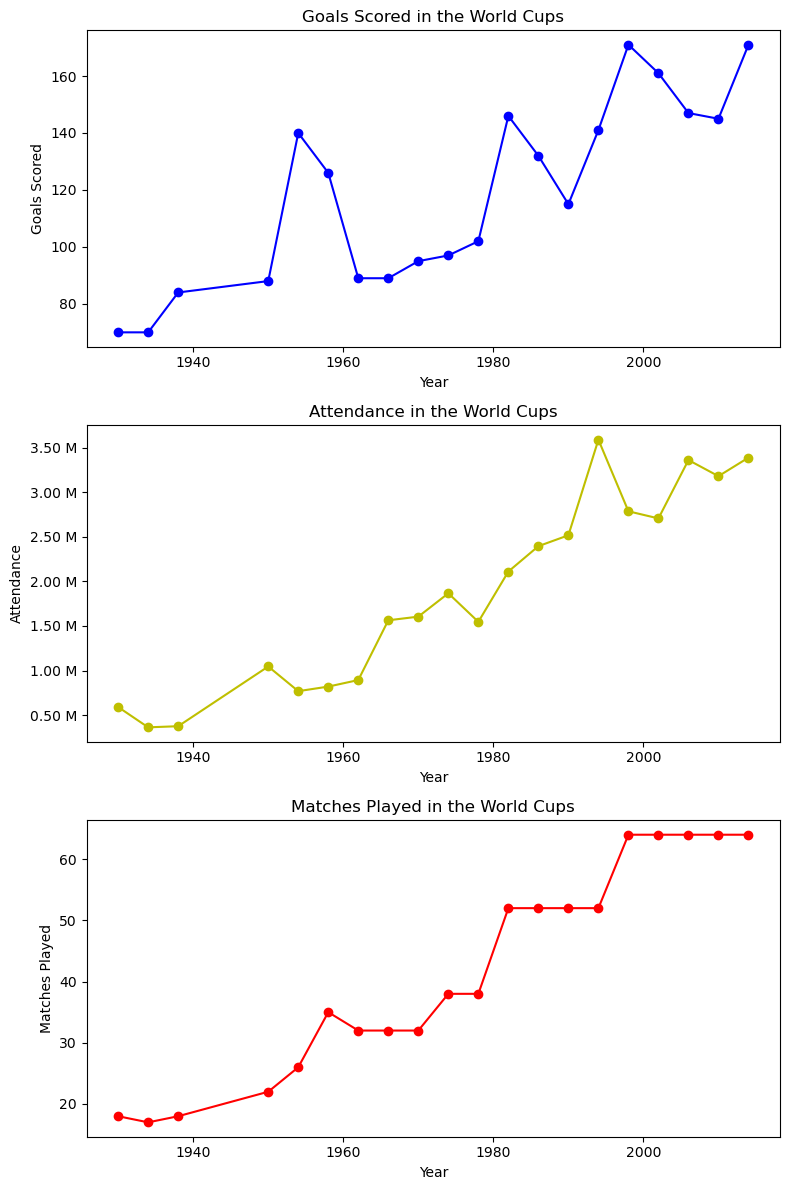

In [23]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


def millions_formatter(x, pos):
    return f'{x:.2f} M'

attendance_trend_modified=attendance_trend.copy()
attendance_trend_modified['Attendance']=attendance_trend_modified['Attendance']/1000000
# Creating subplots to visualize the trends
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Plotting Goals Scored trend
axes[0].plot(goals_trend.index, goals_trend['GoalsScored'], marker='o', color='b')
axes[0].set_title('Goals Scored in the World Cups')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Goals Scored')


# Plotting Attendance trend
axes[1].plot(attendance_trend_modified.index, attendance_trend_modified['Attendance'], marker='o', color='y')
axes[1].set_title('Attendance in the World Cups')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Attendance')
axes[1].yaxis.set_major_formatter(FuncFormatter(millions_formatter))


# Plotting Matches Played trend
axes[2].plot(matches_trend.index, matches_trend['MatchesPlayed'], marker='o', color='r')
axes[2].set_title('Matches Played in the World Cups')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Matches Played')


plt.tight_layout()
plt.show()


### Summary Statistics for World Cups
The average number of goals scored per tournament is approximately 119, with a maximum of 171 goals scored in the 1998 and 2014 tournaments.
The average attendance across all World Cups is about 1.87 million, with a peak of approximately 3.59 million in 1994.
The number of matches played has increased over time, with recent tournaments featuring 64 matches.
### Goals Scored Trend:
The trend in goals scored shows an increase over time, particularly notable in the 1982, 1994, 1998, 2002, and 2014 tournaments.
### Attendance Trend:
Attendance has generally increased over time, with significant spikes in 1994, 2006, and 2014, indicating the growing popularity of the World Cup.
### Matches Played Trend:
The number of matches played has increased as more teams qualified for the tournament, particularly since 1982, when the tournament expanded to include more teams.

# Winner Analysis

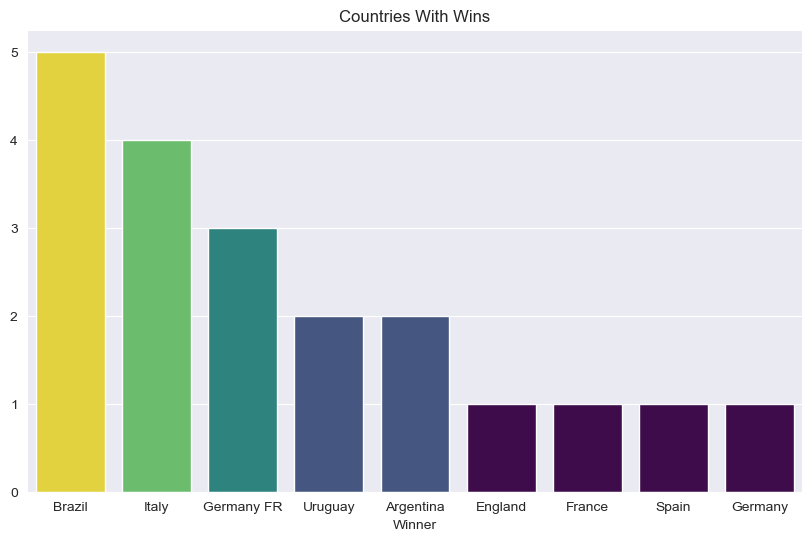

In [38]:
import seaborn as sns
Winners=df_WorldCups_cleaned['Winner'].value_counts().reset_index()
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
plt.title('Countries With Wins')
sns.barplot(x='Winner', y='count',data=Winners,hue='count',palette='viridis')
plt.legend().remove()
plt.ylabel('')
plt.show()